 # Transformacion de ondas
## > Omar Flores Sanchez
## > Valeria Jahzeel Castañon Hernandez

In [171]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

In [187]:
# ----------- convolucion --------------
def convolucion(ancho, alto, Sn, S):
    mat = np.zeros((ancho, alto)) # matriz de la imagen
    
    for x in range(1, ancho-1):
        for y in range(1, alto-1):
            for x2 in range(3):
                for y2 in range(3):
                    mat[x, y] += S[x+x2-1, y+y2-1] * Sn[x2, y2]
    
    imagen = Image.fromarray(mat)
    plt.imshow(imagen)
    return mat                      

In [188]:
# ----------- mapa en x e y ------------
def mapa(ancho, alto, a,S,G):
    mat = np.empty((ancho,alto)) # matriz de la imagen
    
    for x in range(ancho):
        for y in range(alto):
            mat[x, y] = x + a * S[x, y] * G[x, y]
    
    imagen = Image.fromarray(mat)
    plt.imshow(imagen)
    
    return mat

(245, 205)


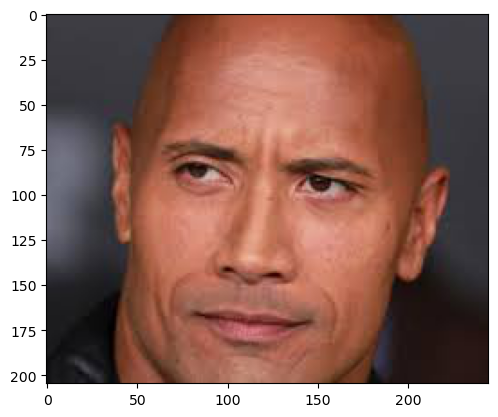

In [189]:
# ---------- TRANSFORMACION DE ONDAS ------------
# mostrar 3 diferentes efectos que se puedean apreciar facilmente al variar los parametros cx,cy,f,p

foto = Image.open("roca.jpg")

#Se redimenciona pa mas facil.
ancho, alto = foto.size
print(foto.size)
plt.imshow(foto)


(205, 245)


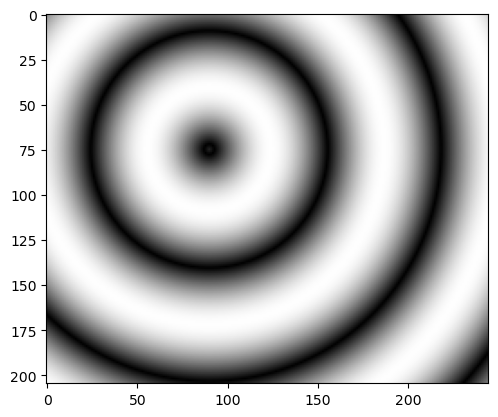

In [55]:
# superficie deformante
S = np.empty((ancho,alto)) # matriz de la imagen

# constantes
f = 0.05  # frecuencia
p = 3  # fase
cx = 75  #centro 
cy = 90  # centro

for x in range(ancho):
    for y in range(alto):
        ecuacion = abs(math.sin( f * math.sqrt(math.pow((x-cx),2) + math.pow((y-cy),2)) + p))
        
        S[x,y] = ecuacion*255
       
        
# pasa el arreglo a una imagen
superficie_def = Image.fromarray(S)
plt.imshow(superficie_def)

print(S.shape)


In [56]:
# ----------- TRANSFORMACION DE LA IMAGEN -------------

#definirmos Sx y Sy
Sx = np.array([[-1,0,1],
             [-2,0,2],
             [-1,0,1]])

#print(Sx)

Sy = np.array([[-1,-2,-1],
             [0,0,0],
             [1,2,1]])

#print(Sy)

(205, 245)


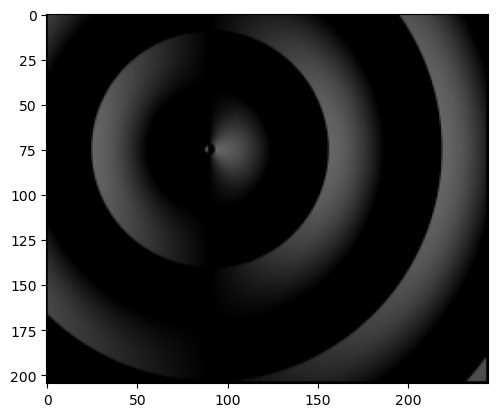

In [57]:
# Clcular Gx = Sx x S
Gx = convolucion(Sx,S)
print(Gx.shape)
#print(Gx)

(205, 245)


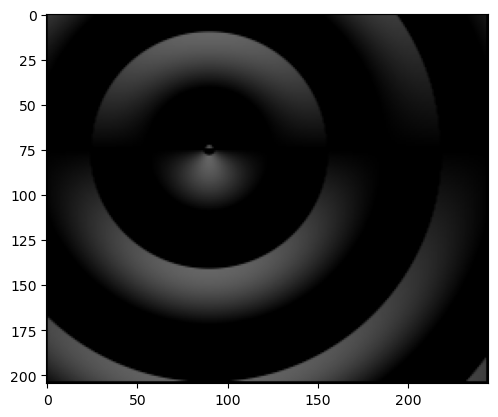

In [58]:
# Calcular Gy = Sy x S
Gy = convolucion(Sy,S)
print(Gy.shape)
#print(Gy)

(205, 245)


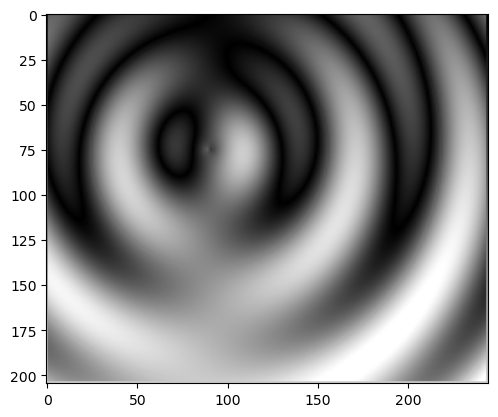

In [59]:
a = 0.01  # grado de la transformacion

MapaX = mapa( a , S, Gx)
print(MapaX.shape)
#print(MapaX)

(205, 245)


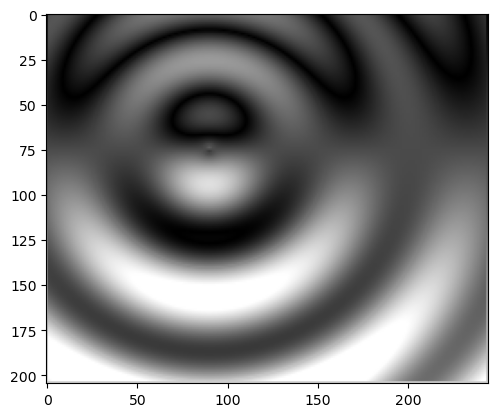

In [60]:
MapaY = mapa( a , S, Gy)
print(MapaY.shape)
#print(MapaY)

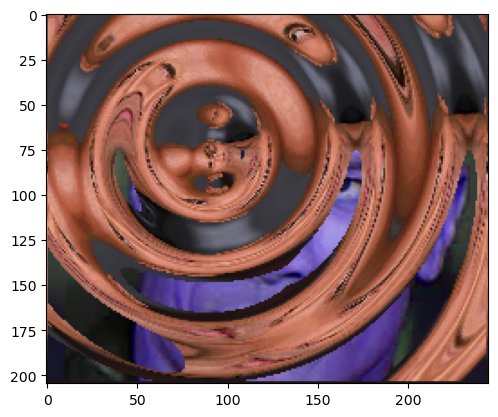

In [61]:
def resultado(imagen, Mx, My):
    foto = np.array(imagen)
    mat = np.empty_like(foto)

    for x in range(ancho):
        for y in range(alto):
            if(Mx[x,y]<=foto.shape[0] and My[x,y]<=foto.shape[1]):
                mat[x, y] = foto[int(Mx[x, y]), int(My[x, y])]
               
    img = Image.fromarray(mat)
    plt.imshow(img)

resultado(foto,MapaX,MapaY)

In [43]:
print(ancho,alto)
resultado(ancho,alto,foto,MapaX,MapaY)

205 245


IndexError: image index out of range

foto redimensionada
205 245
(205, 245)
(205, 245)


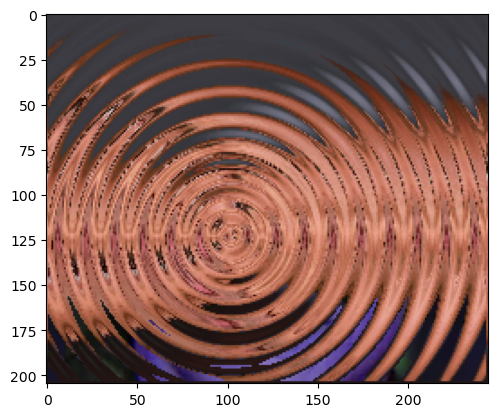

In [33]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math
# ----------- convolucion --------------
def convolucion(Sn, S):
    mat = np.zeros((ancho, alto)) # matriz de la imagen
    
    for x in range(1, ancho-1):
        for y in range(1, alto-1):
            for x2 in range(3):
                for y2 in range(3):
                    mat[x, y] += S[x+x2-1, y+y2-1] * Sn[x2, y2]
    
    imagen = Image.fromarray(mat)
    plt.imshow(imagen)
    return mat                      
# ----------- mapa en x e y ------------
def mapa(a,S,G):
    mat = np.empty((ancho,alto)) # matriz de la imagen
    
    for x in range(ancho):
        for y in range(alto):
            mat[x, y] = abs(x + a * S[x, y] * G[x, y])
    
    imagen = Image.fromarray(mat)
    plt.imshow(imagen)
    
    return mat
def redimensionar(foto):
    ancho = 245
    alto = 205
    nueva = foto.resize((ancho,alto))
    print("foto redimensionada")
    plt.imshow(nueva)
    return nueva
# ---------- TRANSFORMACION DE ONDAS ------------
# mostrar 3 diferentes efectos que se puedean apreciar facilmente al variar los parametros cx,cy,f,p

foto = Image.open("roca.jpg")

#Se redimenciona pa mas facil.
#ancho, alto = foto.size
ancho = 205
alto = 245

foto = redimensionar(foto)
print(ancho,alto)
#plt.imshow(foto)

# superficie deformante
S = np.empty((ancho,alto)) # matriz de la imagen

# constantes
f = 0.2  # frecuencia
p = 2  # fase
cx = 123  #centro 
cy =102  # centro

for x in range(ancho):
    for y in range(alto):
        ecuacion = math.sin( f * math.sqrt(math.pow((x-cx),2) + math.pow((y-cy),2)) + p)
        
        S[x,y] = ecuacion*255
       
        
# pasa el arreglo a una imagen
superficie_def = Image.fromarray(S)
plt.imshow(superficie_def)

# ----------- TRANSFORMACION DE LA IMAGEN -------------

#definirmos Sx y Sy
Sx = np.array([[-1,0,1],
             [-2,0,2],
             [-1,0,1]])

#print(Sx)

Sy = np.array([[-1,-2,-1],
             [0,0,0],
             [1,2,1]])

#print(Sy)
# Clcular Gx = Sx x S
Gx = convolucion(Sx,S)
print(Gx.shape)
#print(Gx)
# Calcular Gy = Sy x S
Gy = convolucion(Sy,S)
print(Gy.shape)
#print(Gy)
a = 0.001  # grado de la transformacion

MapaX = mapa(a , S, Gx)
#print(MapaX.shape)
#print(MapaX)
MapaY = mapa(a , S, Gy)
#print(MapaY.shape)
#print(MapaY)
def resultado(imagen, Mx, My):
    foto = np.array(imagen)
    mat = np.empty_like(foto)

    for x in range(ancho):
        for y in range(alto):
            if(Mx[x,y]<=foto.shape[0] and My[x,y]<=foto.shape[1]):
                mat[x, y] = foto[int(Mx[x, y]), int(My[x, y])]
               
    img = Image.fromarray(mat)
    plt.imshow(img)

resultado(foto,MapaX,MapaY)